# Autoencoders (AEs) with Keras

This lab is based on the following Keras tutorials: [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html) and [Variational AutoEncoder](https://keras.io/examples/generative/vae/)

<br>

## Simple Autoencoder
Loading the MNIST dataset. We discard the dataset labels since the autoencoder just learns how to reconstruct the input from the latent space representation.

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


<br>

Let's plot one of the dataset images.

Image shape: (28, 28)


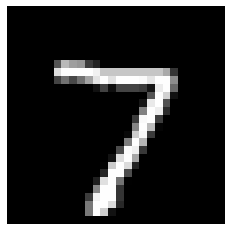

In [ ]:
import matplotlib.pyplot as plt

print("Image shape:", x_test[0].shape)
plt.imshow(x_test[0])
plt.gray()
plt.axis('off')
plt.show()

<br>

Before training the autoencoder, we normalize the values of the input data between 0 and 1. Then, we flatten the 28x28 images into vectors of size 784.

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 784)
x_test shape: (10000, 784)


<br>

Let's build a simple autoencoder. The Dense layer is a Fully Connected layer composed of an arbitrary number of neurons (specified with the first parameter). The neurons of a Fully Connected layer are connected with all the neurons of the previous and of the following layer of the autoencoder.

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(784,))   # the flatten the image to have flatten inputs of 784 values

encoding_dim = 32   # This is the size of the latent space representation
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)  # the encoder will generate the latent space representation

decoded = layers.Dense(784, activation='sigmoid')(encoded)  # the decoder will reconstruct the input of 784 values from the latent space representation

autoencoder = keras.Model(input_img, decoded)   # This model maps an input to its reconstruction

<br>

We are almost ready to train our autoencoder. First of all, we configure the model by specifying the optimizer used to perform the learning process ("Adam") and the loss function to minimize ("binary crossentropy").

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

<br>

Then, we train the autoencoder with the fit method.

In [ ]:
autoencoder.fit(x_train, x_train,
    batch_size=256,
    epochs=50,
    shuffle=True)

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.3824
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1783
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1499
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1326
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1207
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1126
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1067
Epoch 8/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1025
Epoch 9/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0994
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0974
Epoch 11/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0960
Epoch 12/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0951
Epoch 13/50
2

<br>

Let's see how the autoencoder reconstruct an example taken from the test set.
First of all, we have to get the Encoder and the Decoder from the Autoencoder.

In [ ]:
encoder = keras.Model(input_img, encoded)   # This model maps an input to its encoded representation (Encoder)

encoded_input = keras.Input(shape=(encoding_dim,))                  # This is our encoded/compressed (32-dimensional) input
decoder_layer = autoencoder.layers[-1]                              # Retrieve the last layer of the autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))  # Create the Decoder model

<br>

Then, we can compress the data with the Encoder and reconstruct them with the Decoder.

In [ ]:
encoded_imgs = encoder.predict(x_test)          # from the x_test we compress the data to 32-dimensional images with the Encoder
decoded_imgs = decoder.predict(encoded_imgs)    # we reconstruct the input with the Decoder

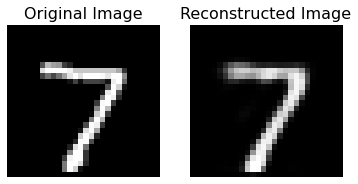

In [ ]:
plt.figure(figsize=(6, 3))

ax = plt.subplot(1, 2, 1)
plt.title("Original Image", fontsize=16)
plt.imshow(x_test[0].reshape(28, 28))
plt.axis('off')

ax = plt.subplot(1, 2, 2)
plt.title("Reconstructed Image", fontsize=16)
plt.imshow(decoded_imgs[0].reshape(28, 28))
plt.axis('off')

plt.show()

<br>

Let's create a function to plot a row of original images and a row with the corresponding reconstructed output.

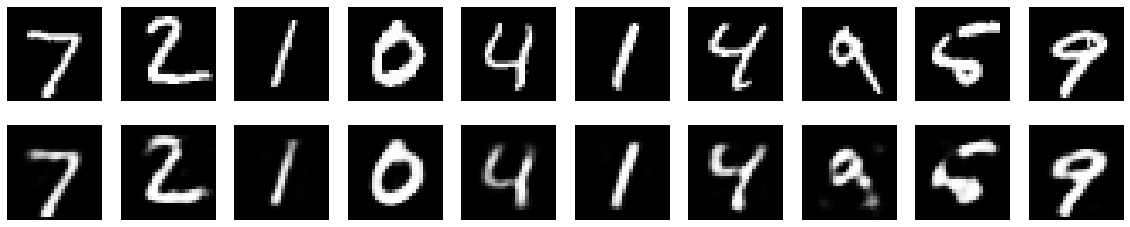

In [ ]:
def plot_first_n_imgs(n, first_row_imgs, second_row_imgs):
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # Display the original images
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(first_row_imgs[i].reshape(28, 28))
      plt.axis('off')

      # Display the reconstructed images
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(second_row_imgs[i].reshape(28, 28))
      plt.axis('off')
  plt.show()

plot_first_n_imgs(n=10, first_row_imgs=x_test, second_row_imgs=decoded_imgs)

<br>

<hr>

## Deep Autoencoder
Let's build a deep autoencoder. We just have to add more hidden layers in both the Encoder and the Decoder.

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3434
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1623
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1355
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1248
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1181
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1137
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1105
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1079
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1056
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1037
Epoch 11/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1019
Epoch 12/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1007
Epoch 13/50
2

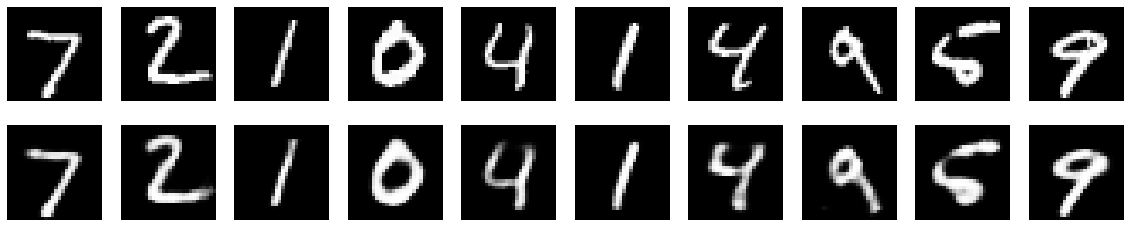

In [ ]:
# get Encoder and Decoder separately
encoder = keras.Model(input_img, encoded)   

encoded_input = keras.Input(shape=(encoding_dim,))    
decoder_layers = autoencoder.layers[-3](encoded_input)    # Retrieve the layers of the Decoder from the autoencoder model
decoder_layers = autoencoder.layers[-2](decoder_layers)
decoder_layers = autoencoder.layers[-1](decoder_layers)
decoder = keras.Model(encoded_input, decoder_layers)      # Create the decoder model

# get the decoded images
encoded_imgs = encoder.predict(x_test)          
decoded_imgs = decoder.predict(encoded_imgs)

plot_first_n_imgs(10, x_test, decoded_imgs)

<br>

<hr>

## Stacked Autoencoder
Let's transform the Deep Autoencoder in a Stacked Autoencoder.

<br>

Firstly, we create the first autoencoder that generates a 128-dimensional latent space representation.

In [ ]:
input1 = keras.Input(shape=(784,))   
encoded1 = layers.Dense(128, activation='relu')(input1)  
decoded1 = layers.Dense(784, activation='sigmoid')(encoded1) 

autoencoder1 = keras.Model(input1, decoded1)
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder1.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, verbose=0)  # verbose=0 to avoid prints

<br>

Here, we get the data encoded with the Encoder of the first Autoencoder.

In [ ]:
encoder1 = keras.Model(input1, encoded1)
encoded_x_train1 = encoder1.predict(x_train)
encoded_x_test1 = encoder1.predict(x_test)

<br>

And we train the second autoencoder that generates a 64-dimensional latent space representation.

In [ ]:
input2 = keras.Input(shape=(128,))   
encoded2 = layers.Dense(64, activation='relu')(input2)  
decoded2 = layers.Dense(128, activation='sigmoid')(encoded2) 

autoencoder2 = keras.Model(input2, decoded2)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder2.fit(encoded_x_train1, encoded_x_train1, epochs=50, batch_size=256, shuffle=True, verbose=0)

<br>

Here, we get the data encoded with the Encoder of the second Autoencoder.

In [ ]:
encoder2 = keras.Model(input2, encoded2)
encoded_x_train2 = encoder2.predict(encoded_x_train1)
encoded_x_test2 = encoder2.predict(encoded_x_test1)

<br>

And we train the third and last autoencoder that generates a 32-dimensional latent space representation.

In [ ]:
input3 = keras.Input(shape=(64,))   
encoded3 = layers.Dense(32, activation='relu')(input3)  
decoded3 = layers.Dense(64, activation='sigmoid')(encoded3) 

autoencoder3 = keras.Model(input3, decoded3)
autoencoder3.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder3.fit(encoded_x_train2, encoded_x_train2, epochs=50, batch_size=256, shuffle=True, verbose=0)

<br>

Here, we get the data encoded by the Stacked Autoencoder.

In [ ]:
encoder3 = keras.Model(input3, encoded3)
encoded_x_train3 = encoder3.predict(encoded_x_train2)
encoded_x_test3 = encoder3.predict(encoded_x_test2)

In [ ]:
print("From shape {} to shape {}".format(x_test.shape, encoded_x_test3.shape))

From shape (10000, 784) to shape (10000, 32)


<br>

<hr>

## Sparse Autoencoder
It's very easy to create a Sparse Autoencoder in Keras. We just add a regularization parameter to the layer of the Encoder!

Here you can find a deep explaination about the use of the L1 Regularizer: [Intuitions on L1 and L2 Regularisation](https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261)

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))

# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
                
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.3895
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1880
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1594
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1420
Epoch 5/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1306
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1235
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1184
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1147
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1116
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1095
Epoch 11/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1078
Epoch 12/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1069
Epoch 13/50
2

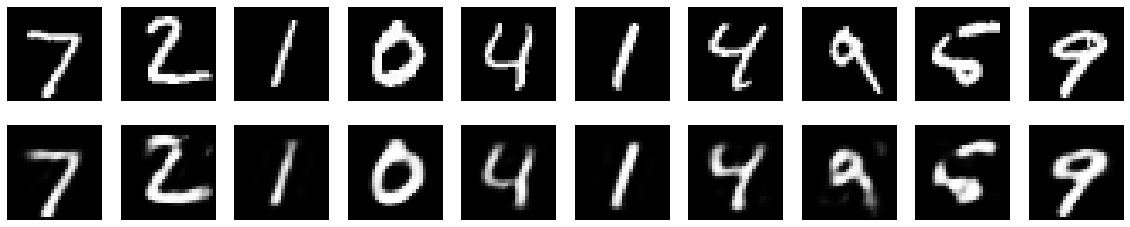

In [ ]:
# get Encoder and Decoder separately
encoder = keras.Model(input_img, encoded)   
encoded_input = keras.Input(shape=(encoding_dim,))    
decoder_layer = autoencoder.layers[-1]    
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))  

# get the decoded images
encoded_imgs = encoder.predict(x_test)          
decoded_imgs = decoder.predict(encoded_imgs)

plot_first_n_imgs(10, x_test, decoded_imgs)

<br>

<hr>

## De-noising Autoencoder
Let's create a De-noising Autoencoder. We will train the autoencoder to map noisy digits images to clean digits images.

<br>

First of all, we add some noise to the data. We just apply gaussian noise and clip the images in order to have values between 0 and 1.

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

<br>

The first row show the original images, while the second row show the corresponding noisy images.

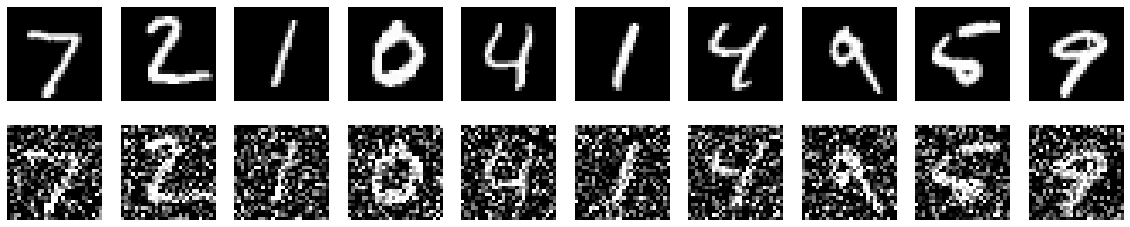

In [ ]:
plot_first_n_imgs(10, x_test, x_test_noisy)

<br>

Let's train a simple de-noising autoencoder!

In [ ]:
input_img = keras.Input(shape=(784,))   # the flatten the image to have flatten inputs of 784 values

encoding_dim = 32   # This is the size of the latent space representation
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)  # the encoder will generate the latent space representation

decoded = layers.Dense(784, activation='sigmoid')(encoded)  # the decoder will reconstruct the input of 784 values from the latent space representation

autoencoder = keras.Model(input_img, decoded)   # This model maps an input to its reconstruction

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3661
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2051
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1765
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1614
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1505
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1431
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1371
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1336
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1313
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1296
Epoch 11/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1289
Epoch 12/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1282
Epoch 13/50
2

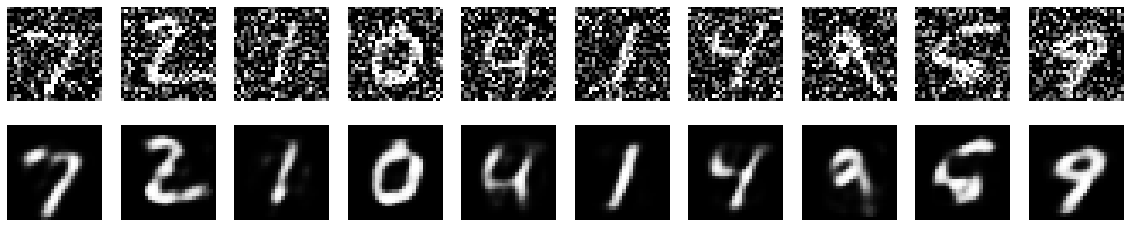

In [ ]:
# get Encoder and Decoder separately
encoder = keras.Model(input_img, encoded)   
encoded_input = keras.Input(shape=(encoding_dim,))    
decoder_layer = autoencoder.layers[-1]    
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))  

# get the decoded images
encoded_imgs = encoder.predict(x_test_noisy)          
decoded_imgs = decoder.predict(encoded_imgs)

plot_first_n_imgs(10, x_test_noisy, decoded_imgs)

<br>

<hr>

## Variational Autoencoder

Instead of learning how to compress the input data, a Variational Autoencoder (VAE) will learn the parameters of a probability distribution that models the input data.

<br>

First of all, we map the input to two parameters of the latent space: z_mean and z_log_sigma.

In [ ]:
original_dim = 28 * 28    # 784
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

<br>

Then, we sample points z from the latent distribution that we assume models our input data. This distribution is based on the two parameters z_mean and z_log_sigma.

In [ ]:
from keras import backend as K

def sampling(args): # Uses (z_mean, z_log_sigma) to sample z, the vector encoding a digit
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim))
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

<br>

The VAE will encode the inputs in the latent space distribution through the Encoder. Then the Decoder will take the z points from the latent representation and reconstruct the original data.

In [ ]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs)

<br>

Here, we define a combination of two loss functions. 
1. The **Reconstruction Loss**: forces the decoded samples to match the input data (as the other AEs)
2. The **Kullback–Leibler (KL) Divergence**: this measures how the latent distribution we are learning is different from a normal distribution that we use as a regularization term.

In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
vae.fit(x_train, x_train, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 238.8716
Epoch 2/100
1875/1875 [==============================] - 7s 3ms/step - loss: 172.0239
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 166.2670
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 163.8786
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 162.3412
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 160.8248
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 159.5071
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 159.1162
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 158.1060
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - loss: 157.8835
Epoch 11/100
1875/1875 [==============================] - 7s 4ms/step - loss: 157.0221
Epoch 12/100
1875/1875 [============================

<br>

Since each parameter of the latent space is two-dimensional, we can visualize the neighborhoods of each class of digits based on one of the encoded parameters. Here, we use the z_mean parameter to visualize how the different classes are distributed on a 2D plane.

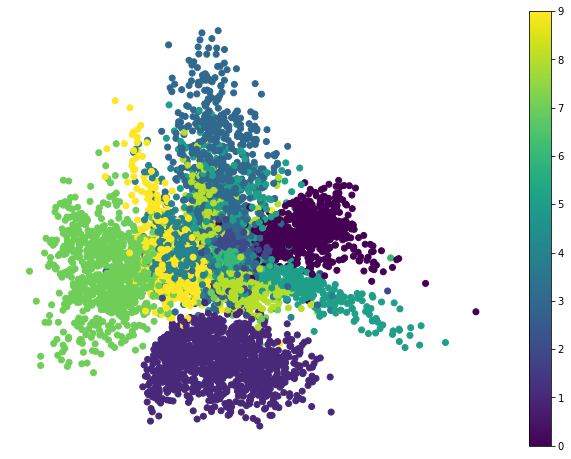

In [ ]:
(_, y_train), (_, y_test) = mnist.load_data()

x_test_encoded = encoder.predict(x_test)[0]   # with [0] we take the z_mean
x_test_encoded = np.asarray(x_test_encoded)

plt.figure(figsize=(11, 8))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap="viridis")
plt.colorbar()
plt.axis('off')
plt.show()

<br>

We can use the VAE to generate new digits. Here, we scan the latent space by sampling points at regular intervals. Then, we ask the decoder to generate the digit corresponding to each of these sampled points.

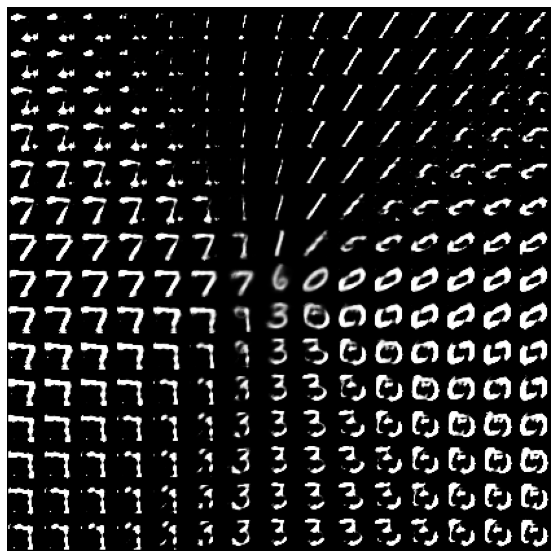

In [ ]:
# Display a matrix with 15x15 digits sampled from the latent space representation
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.axis('off')
plt.show()

<br>

<hr>

# Generative Adversarial Networks (GANs) with Keras